In [16]:
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.colors as mcolors
import random
import seaborn as sns

In [17]:
palette = sns.color_palette("Spectral", 122)
random.shuffle(palette)

In [18]:
data = np.load("GC_Dataset_ped1-12685_time1000-1060_interp9_xrange5-25_yrange15-35.npy", allow_pickle=True)

0.10795465164136633


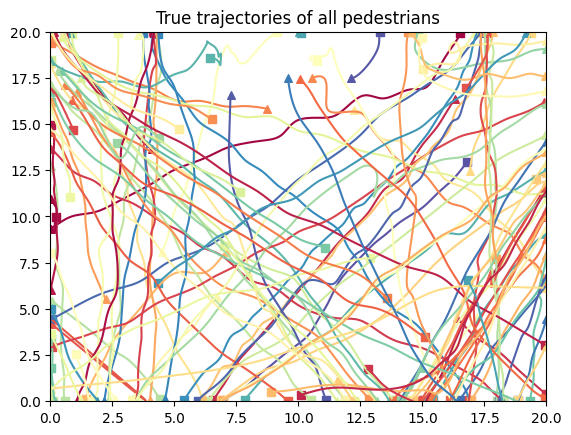

In [19]:
np.random.seed(42)

start_pos = []

for item in data[1][:-1]:
    xyt = item[:2]
    # xy[:,0] -= 5
    # xy[:,1] -= 15
    start_pos.append(xyt)

distance = 0
for i in start_pos:
    coords = np.array(i)[:, :2]
    distance += np.linalg.norm((coords[0] - coords[1])) / 121

print(distance)    

for index, item in enumerate(data[1]):
    xy = np.array(item) # xyt over all timesteps
    #print(xy)
    ts = xy[:,2] # applicatble timesteps
    
    # choose color for the pedestrian
    assigned_color = tuple(palette[index])
    
    plt.plot(xy[:,0]-5, xy[:,1]-15, color = assigned_color)
    for t in range(750): # all time steps
        if t in ts:
            if t == min(ts): # if we are at the starting timestep of this pedestrian's trajectory
                plt.scatter(xy[0,0]-5, xy[0,1]-15, s=30, marker='^', color = assigned_color)
                #plt.plot(xy[:,0]-5, xy[:,1]-15)
            elif t == max(ts): # ending timestep
                plt.scatter(xy[-1,0]-5, xy[-1,1]-15, s=30, marker='s', color = assigned_color)             

plt.xlim(0,20)
plt.ylim(0,20)
plt.title("True trajectories of all pedestrians")
plt.show()

In [20]:
actual_x = np.zeros((121, 750))
actual_y = np.zeros((121, 750))
for i, item in enumerate(data[1][:-1]):
    xy = np.array(item)
    ts = xy[:,2]
    for j, t in enumerate(ts):
        actual_x[i][int(t)] = xy[:,0][j]
        actual_y[i][int(t)] = xy[:,1][j]

actual_x -= 5
actual_y -= 15

In [21]:
def init_theta(coord1, coord2):
    dx = coord2[0] - coord1[0]  # Change to relative difference (destination - origin)
    dy = coord2[1] - coord1[1]  # Change to relative difference (destination - origin)
    
    theta = math.atan2(dy, dx)  # This automatically accounts for the direction in all quadrants
    
    return theta

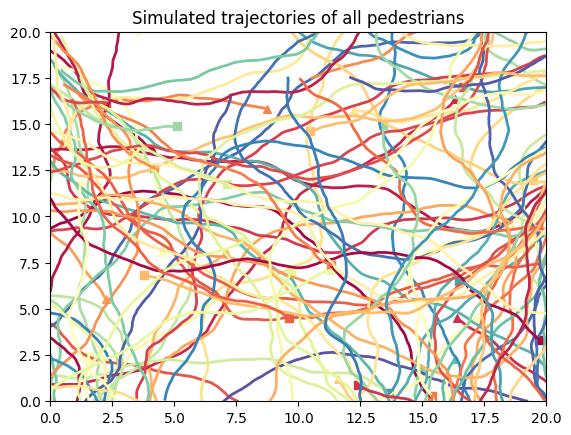

In [22]:
r = distance
pax = [{'on' : False, 'exit' : False, 'x' : None, 'y' : None, 'theta' : None} for _ in range(121)]
plt_x = np.zeros((121, 750)) # matrix storing x coordinates for all 121 walkers at 750 timesteps
plt_y = np.zeros((121, 750))# matrix storing y coordinates for all 121 walkers at 750 timesteps

for t in range(750):
    for p in pax:
        if p['on'] == True:
            ## Give people a chance to stay on map if they try to step off once
            # flag = True
            # while flag:
            #     if p['exit'] == True:
            #         flag = False
            #     p['theta'] += np.random.normal(0, 0.1)
            #     new_x = p['x'] + r * np.cos(p['theta'])
            #     new_y = p['y'] + r * np.sin(p['theta'])
            #     if new_x > 5 and new_x < 25 and new_y > 15 and new_y < 35:
            #         flag = False
            #         p['x'] = new_x
            #         p['y'] = new_y
            #     else:
            #         p['exit'] = True

            p['x'] += r * np.cos(p['theta'])
            p['y'] += r * np.sin(p['theta'])
            if p['x'] > 5 and p['x'] < 25 and p['y'] > 15 and p['y'] < 35:
                p['theta'] += np.random.normal(0, 0.1) # np.random.choice([0, np.pi/2, np.pi, 3/2 * np.pi])
            else:
                p['on'] = False

    for i, item in enumerate(data[1][:-1]):
        if item[0][2] == t:
            xyt = item[:2]
            pax[i] = {'on' : True, 'exit' : False, 'x' : item[0][0], 'y' : item[0][1], 'theta' : init_theta(xyt[0], xyt[1])}

    for i, p in enumerate(pax):
        if p['on'] == True:
            plt_x[i][t] = p['x']
            plt_y[i][t] = p['y']

plt_x -= 5
plt_y -= 15

for i in range(121):
    
    # choose color for the pedestrian
    assigned_color = tuple(palette[i])
    
    plt.plot(np.ma.masked_where(plt_x[i] == -5, plt_x[i]), np.ma.masked_where(plt_y[i] == -15, plt_y[i]), lw=2, color = assigned_color)
    # mark starting point
    plt.scatter(plt_x[i][0], plt_y[i][0], s=30, marker='^', color = assigned_color)
    # mark ending point
    plt.scatter(plt_x[i][-1], plt_y[i][-1], s=30, marker='s', color = assigned_color)
    
    
plt.xlim(0,20)
plt.ylim(0,20)
plt.title("Simulated trajectories of all pedestrians")
plt.show()

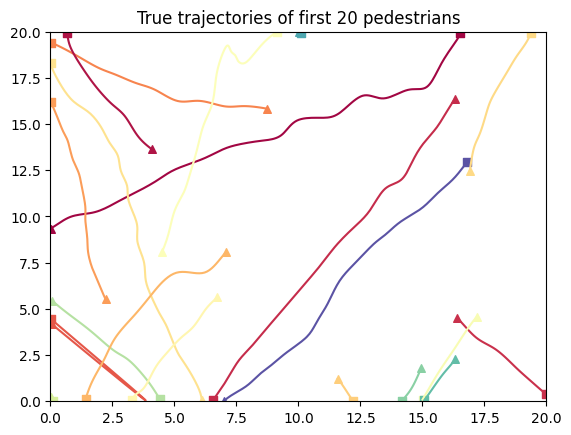

In [23]:
cutoff = 20
for index, item in enumerate(data[1][:cutoff]):
    xy = np.array(item) # xyt over all timesteps
    #print(xy)
    #print("end of xy")
    ts = xy[:,2] # applicatble timesteps
    
    # choose color for the pedestrian
    assigned_color = tuple(palette[index])
    
    plt.plot(xy[:,0]-5, xy[:,1]-15, color = assigned_color)
    for t in range(750): # all time steps
        if t in ts:
            if t == min(ts): # if we are at the starting timestep of this pedestrian's trajectory
                plt.scatter(xy[0,0]-5, xy[0,1]-15, s=30, marker='^', color = assigned_color)
                #plt.plot(xy[:,0]-5, xy[:,1]-15)
            elif t == max(ts): # ending timestep
                plt.scatter(xy[-1,0]-5, xy[-1,1]-15, s=30, marker='s', color = assigned_color)             

plt.xlim(0,20)
plt.ylim(0,20)
plt.title(f"True trajectories of first {cutoff} pedestrians")
plt.show()

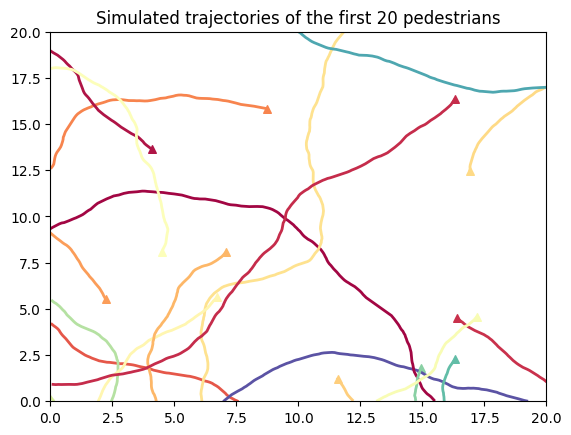

In [24]:
cutoff = 20
for i in range(cutoff):
    # choose color for the pedestrian
    assigned_color = tuple(palette[i])
    
    plt.plot(np.ma.masked_where(plt_x[i] == -5, plt_x[i]), np.ma.masked_where(plt_y[i] == -15, plt_y[i]), lw=2, color = assigned_color)
    # mark starting point
    plt.scatter(plt_x[i][0], plt_y[i][0], s=30, marker='^', color = assigned_color)
    # mark ending point
    plt.scatter(plt_x[i][-1], plt_y[i][-1], s=30, marker='s', color = assigned_color)
    
    
plt.xlim(0,20)
plt.ylim(0,20)
plt.title(f"Simulated trajectories of the first {cutoff} pedestrians")
plt.show()

In [25]:
def count_graph(plt_x, plt_y, title=""):
    counts = np.zeros((4, 750))
    for (xx, yy) in zip(plt_x, plt_y):
        for t, (x, y) in enumerate(zip(xx, yy)):
            # Check if the agent has not moved
            if x < 0 or y < 0 or x > 20 or y > 20:
                continue
            # Quadrant I: Top Right
            elif x > 10 and y > 10:
                counts[0][t] += 1
            # Quadrant II: Top Left
            elif x <= 10 and y > 10:
                counts[1][t] += 1
            # Quadrant III: Bottom Left
            elif x <= 10 and y <= 10:
                counts[2][t] += 1
            # Quadrant IV: Bottom Right
            elif x > 10 and y <= 10:
                counts[3][t] += 1
            else:
                # This else block might be unnecessary because all possibilities are covered
                raise(Exception("Unexpected condition encountered."))

    for q, quadrant in enumerate(counts):
        plt.plot(range(750), quadrant, label=f"Quadrant {q+1}")
    plt.xlabel("t")
    plt.ylabel("Count")
    plt.ylim(0,15)
    plt.title(title)
    plt.legend(loc="upper left")
    plt.show()

    return counts

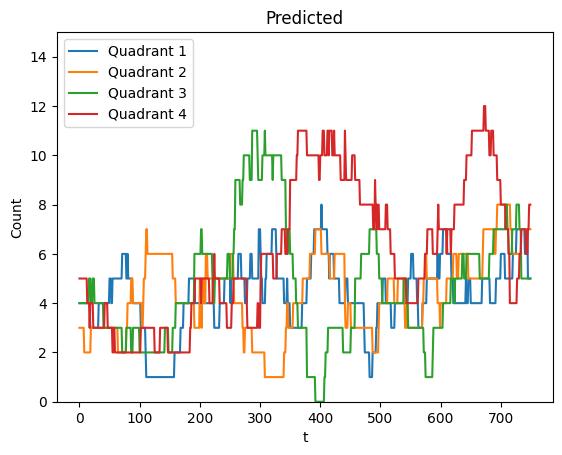

In [26]:
pred_counts = count_graph(plt_x, plt_y, title="Predicted")

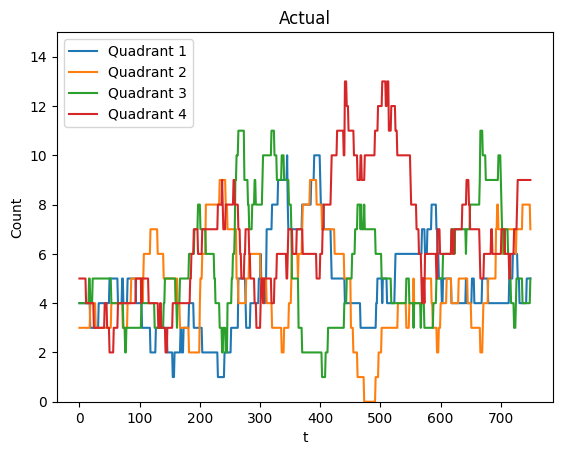

In [27]:
actual_counts = count_graph(actual_x, actual_y, title="Actual")

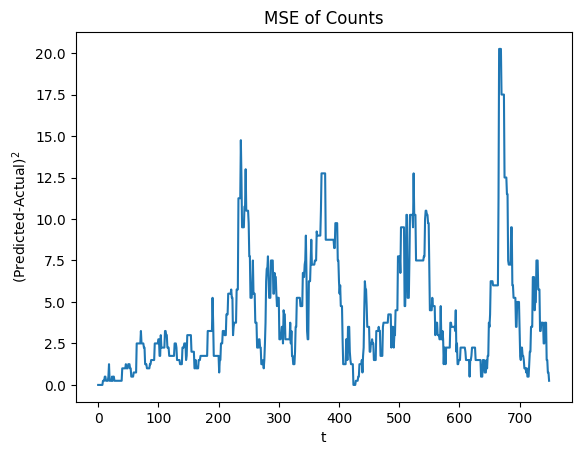

In [28]:
mse = ((pred_counts - actual_counts) ** 2).mean(axis=0)
plt.plot(range(750), mse)
plt.xlabel("t")
plt.ylabel(r"(Predicted-Actual)$^2$")
plt.title("MSE of Counts")
plt.show()

In [29]:
max_frame, max_element = max(enumerate(mse), key=lambda x: x[1])
min_frame, min_element = min(enumerate(mse), key=lambda x: x[1])

print(f"Mean MSE of Quadrant Counts Across Frames: {np.mean(mse):.1f}")
print(f"Std Dev of Quadrant Counts Across Frames: {np.std(mse):.1f}")
print(f"Max MSE of Quadrant Counts Across Frames: {max_element:.1f} @ Frame {max_frame}")
print(f"Min  MSE of Quadrant Counts Across Frames: {min_element:.1f} @ Frame {min_frame}")

Mean MSE of Quadrant Counts Across Frames: 4.1
Std Dev of Quadrant Counts Across Frames: 3.5
Max MSE of Quadrant Counts Across Frames: 20.2 @ Frame 666
Min  MSE of Quadrant Counts Across Frames: 0.0 @ Frame 0


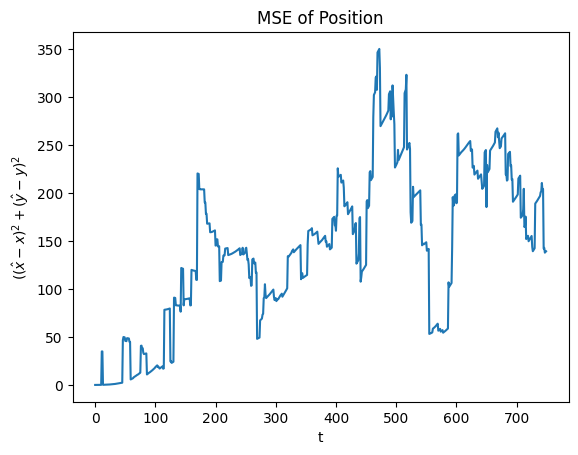

In [30]:
sq_errors = np.zeros(750)
counts = np.zeros(750)
for p_xx, p_yy, a_xx, a_yy in zip(plt_x, plt_y, actual_x, actual_y):
        for t, (p_x, p_y, a_x, a_y) in enumerate(zip(p_xx, p_yy, a_xx, a_yy)):
            if p_x < 0 or p_y < 0 or p_x > 20 or p_y > 20:
                continue
            else:
                sq_errors[t] += (p_x - a_x) ** 2 + (p_y - a_y) ** 2
                counts[t] += 1

mses = []
for i, err in zip(counts, sq_errors):
    if i != 0:
        mses.append(err / i)
    else:
        mses.append(0)

plt.plot(range(750), mses)
plt.xlabel("t")
plt.ylabel(r"$((\hat{x}-x)^2 + (\hat{y}-y)^2$")
plt.title("MSE of Position")
plt.show()